In [1]:
library(dplyr)
library(data.table)


Attache Paket: ‘dplyr’


Die folgenden Objekte sind maskiert von ‘package:stats’:

    filter, lag


Die folgenden Objekte sind maskiert von ‘package:base’:

    intersect, setdiff, setequal, union



Attache Paket: ‘data.table’


Die folgenden Objekte sind maskiert von ‘package:dplyr’:

    between, first, last




In [2]:
# extract protein intensity
dat <- fread("proteinGroups.txt")
prot_int <- as.data.frame(dat[,327:386])

In [3]:
samples <- sub("Intensity ", "", colnames(dat)[327:386])
colnames(prot_int) <- samples
rownames(prot_int) <- dat$`Protein IDs`

In [4]:
head(prot_int)

,786O_NCI60,A498_NCI60,A549_NCI60,ACHN_NCI60,BT549_NCI60,CAKI1_NCI60,CCRFCEM_NCI60,COLO205_NCI60,DU145_NCI60,EKVX_NCI60,⋯,SNB19_NCI60,SNB75_NCI60,SR_NCI60,SW620_NCI60,T47D_NCI60,TK10_NCI60,U031_NCI60,U251_NCI60,UACC257_NCI60,UACC62_NCI60
,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,⋯,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>
P0DN26;A0A075B759;Q9Y536;F5H284;A0A0B4J2A2;P0DN37,3812400,32150000,6094400,4313900,0,47658000,5785500,64889000,33141000,30032000,⋯,18067000,60596000,7556500,8213600,48755000,161350000,0,54603000,48719000,14605000
A0A0B4J2F0,0,0,0,0,0,0,0,0,0,6635200,⋯,0,0,0,0,0,0,0,0,0,0
A0A0C4DH73,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
A0A5B9;P01850,0,0,0,0,0,0,234380000,0,7342300,0,⋯,0,0,5834700,0,0,0,0,10133000,0,35631000
A0AV96;A0AV96-2,73467000,567040000,490700000,1056000000,23231000,242810000,21620000,3138100000,108070000,1439200000,⋯,81147000,21566000,11199000,513940000,857760000,1651300000,470600000,40020000,106450000,0
A0AVF1;A0AVF1-2;A0AVF1-3,6052600,54431000,24653000,52919000,15826000,0,17568000,18730000,9006900,12765000,⋯,75090000,46642000,0,70986000,20219000,62485000,13611000,29807000,53550000,114360000


In [16]:
# BiocManager::install("gagneurlab/OUTRIDER", ref="outrider2",force = TRUE)
library(OUTRIDER)
library(dplyr)

# load protein intensities
prot_int <- read.table("prot_int.csv")
dim(prot_int)


[1] 10825    60

In [17]:
# missing values due to missing detection in the mass-spectrometry must be declared as such, 
# e.g. NAN and must not be kept 0, as this will be considered as true value.
prot_int[prot_int==0] <- NA

outrider_ds <- Outrider2DataSet(inputData=prot_int, profile="protrider")

# filter out features that are not variable across samples or have many N
outrider_ds <- filterExpression(outrider_ds)


260 features did not pass the filter due to no variability across samples. This is 2.4% of the features.

3590 features are filtered out. This is 34% of the features.



In [18]:
outrider_ds 

class: Outrider2DataSet
class: RangedSummarizedExperiment 
dim: 6975 60 
metadata(1): version
assays(1): observed
rownames(6975): P0DN26;A0A075B759;Q9Y536;F5H284;A0A0B4J2A2;P0DN37
  A0AV96;A0AV96-2 ...
  REV__Q9UL68-2;REV__Q9UL68-4;REV__Q9UL68;REV__Q9UL68-3
  REV__Q9UMY1-2;REV__Q9UMY1
rowData names(4): passedFilter passedVariableFeatureFilter
  passedPercentileFilter passedNAFilter
colnames(60): X786O_NCI60 A498_NCI60 ... UACC257_NCI60 UACC62_NCI60
colData names(6): sampleID expressedFeatures ... passedFilterFeatures
  expressedFeaturesRank
------------------- Model parameters -------------------
Profile:                   protrider 
Default distribution:      gaussian 


In [59]:
# visualize the correlations between samples through heatmap
# In most RNA-seq experiments correlations between the samples can be observed. 
# These are often due to technical confounders (e.g. sequencing batch) or biological confounders (e.g. sex, age). 
# These confounders can adversely affect the detection of aberrant features. 
plotSampleCorHeatmap(outrider_ds, normalized=FALSE)

ERROR: Error in plotSampleCorHeatmap(outrider_ds, normalized = FALSE): konnte Funktion "plotSampleCorHeatmap" nicht finden


In [58]:
OUTRIDER:::plotSampleCorHeatmap(outrider_ds)

ERROR: Error in is(ods, "OutriderDataSet"): Objekt 'ods' nicht gefunden


In [60]:
plotCountCorHeatmap(outrider_ds, normalized=FALSE)

ERROR: Error in is(ods, "OutriderDataSet"): Objekt 'ods' nicht gefunden


In [22]:
reticulate::use_condaenv("py_outrider1", conda="/opt/homebrew/bin/conda")
# according to the result before, the optimal result is encod_dim 17, noise factor 1
# here to save time, we only run q = 17
outrider_ds <- OUTRIDER(outrider_ds, q=17)


Thu Jan 12 11:41:48 2023: Preprocessing ...

	Thu Jan 12 11:41:48 2023:  Applying preprocessing function ...

	Thu Jan 12 11:41:48 2023: SizeFactor estimation ...

Thu Jan 12 11:41:48 2023: Controlling for confounders ...

Using specified q = 17

Thu Jan 12 11:41:48 2023: Using the python autoencoder implementation for controlling.

Connecting to the py_outrider python package using reticulate (useBasilisk = FALSE)... 
In case of errors, please make sure to specify the right python binary when loading R.
If you rather want us to automatically setup a conda environment with 'py_outrider'
installed using the 'basilisk' package, please use the argument 'useBasilisk = TRUE'.

Thu Jan 12 12:00:21 2023: Used the python autoencoder implementation for controlling.

Thu Jan 12 12:00:21 2023: P-value calculation ...

Thu Jan 12 12:00:21 2023: Fold-change / zScore / delta calculation ...



In [25]:
res <- results(outrider_ds, all = TRUE)

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 31 rows containing missing values (`geom_bar()`).”


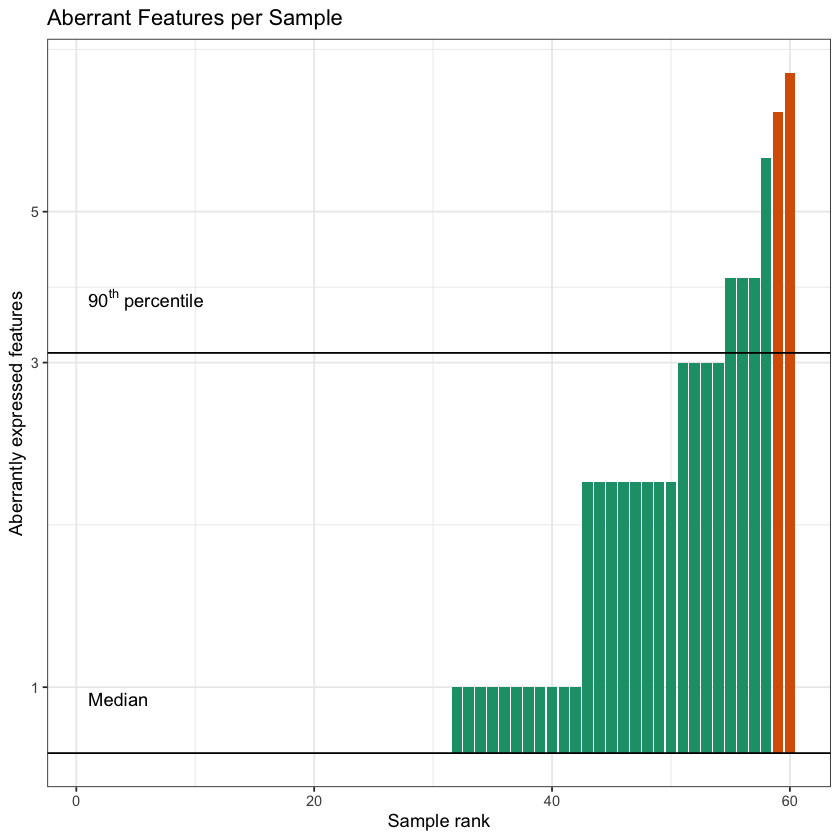

In [24]:
plotAberrantPerSample(outrider_ds, padjCutoff=0.05)

In [61]:
# save the plot
png("AberrantPerSample.png")
plotAberrantPerSample(outrider_ds, padjCutoff=0.05)
dev.off()

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 31 rows containing missing values (`geom_bar()`).”


pdf 
  2

In [26]:
plotSampleCorHeatmap(outrider_ds, normalized=FALSE)

ERROR: Error in plotSampleCorHeatmap(outrider_ds, normalized = FALSE): konnte Funktion "plotSampleCorHeatmap" nicht finden


In [27]:
plotCountCorHeatmap(outrider_ds)

ERROR: Error in is(ods, "OutriderDataSet"): Objekt 'ods' nicht gefunden


In [33]:
# extract fitted AE weights
E <- OUTRIDER:::E(outrider_ds) # encoder weights
D <- OUTRIDER:::D(outrider_ds) # decoder weights
b <- OUTRIDER:::b(outrider_ds) # bias, originally initialized as mean(log.intensity) per protein



In [34]:
# recompute AE predictions without NA
x0 <- preprocessed(outrider_ds) # input values in log space
b0 <- rowMeans(x0, na.rm=TRUE)
x <- t(x0 - b0) # input to the AE, values are centered
x[is.na(x)] <- 0 # NAs get replaced with zeros to allow matrix multiplication
H <- x %*% E # computation of the latent space
pred_no_na <- t(H %*% D) + matrix(b, nrow=nrow(outrider_ds), ncol=ncol(outrider_ds)) # decode from latent space with decoder weights and bias

In [50]:
rownames(pred_no_na) <- rownames(outrider_ds)

In [52]:
head(pred_no_na)
write.table(pred_no_na, "pred_no_na.txt", row.names = TRUE)

,X786O_NCI60,A498_NCI60,A549_NCI60,ACHN_NCI60,BT549_NCI60,CAKI1_NCI60,CCRFCEM_NCI60,COLO205_NCI60,DU145_NCI60,EKVX_NCI60,⋯,SNB19_NCI60,SNB75_NCI60,SR_NCI60,SW620_NCI60,T47D_NCI60,TK10_NCI60,U031_NCI60,U251_NCI60,UACC257_NCI60,UACC62_NCI60
P0DN26;A0A075B759;Q9Y536;F5H284;A0A0B4J2A2;P0DN37,23.82530,24.89250,23.46536,24.26511,24.99417,25.46808,23.91395,25.65536,23.57569,24.38698,⋯,25.54598,26.19636,22.81692,24.31618,25.50504,25.56392,23.95363,25.12832,25.17307,25.84836
A0AV96;A0AV96-2,26.95893,28.67702,29.12149,29.22591,24.08905,27.47051,22.85227,32.45874,28.00763,29.90481,⋯,25.51139,25.44076,26.48217,28.93228,29.98096,28.86376,26.97917,26.17529,25.60923,25.94243
A0AVF1;A0AVF1-2;A0AVF1-3,23.77847,24.47958,23.40375,26.09918,24.29845,24.66992,25.21604,24.20237,24.03991,23.12396,⋯,25.57966,25.25518,26.65104,25.98517,23.99013,24.89343,25.10870,25.50019,24.60681,24.27626
A0AVT1;A0AVT1-2;A0AVT1-3;A0AVT1-4,31.90762,31.70965,31.41251,32.39082,31.29363,32.02402,31.57607,31.04223,31.72583,31.25707,⋯,31.48502,31.35044,31.52994,31.32385,31.54180,32.04987,31.81649,31.61414,30.10508,30.35830
A0FGR8-6;A0FGR8,29.53564,26.32843,26.11850,24.78599,26.70081,25.57264,27.98287,27.27502,26.03777,27.61926,⋯,26.92745,26.57684,28.59774,26.38374,25.82347,25.27722,26.00291,25.33322,26.35553,24.34689
A0JLT2;A0JLT2-2,24.02672,25.56828,26.18665,24.93679,25.16909,25.26828,26.73343,25.75000,25.72822,25.16022,⋯,25.08475,24.77894,25.33499,25.66370,26.69872,24.44849,25.86691,25.13800,25.44573,25.14074


In [62]:
write.table(res, "outrider_res.txt", row.names = TRUE)